In [1]:
import networks as nt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'pdf.fonttype': 42, 'ps.fonttype': 42})
plt.rcParams.update({'font.size': 10, 'font.family': 'Helvetica'})

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

In [2]:
# Create Network and Simulation Parameters
dim = 2
threshold = 3
seed = 1

time_r = 0.4
time_c = 2
dt = 1e-4
T_r = int(time_r / dt)
T_c = int(time_c / dt)
T_1 = int(T_c / 3)
T_2 = 2 * T_1

s_mag = 5
lambd = 10
noise = 0

N = 6
F = np.array([[1, 0],
              [1/2, np.sqrt(3)/2],
              [-1/2, np.sqrt(3)/2],
              [-1, 0],
              [-1/2, -np.sqrt(3)/2],
              [1/2, -np.sqrt(3)/2]])
Th = threshold * np.ones(N)
D = F.T
Omega = np.dot(F, D)
Lambd = lambd * np.ones(N)

np.random.seed(seed)
angle = 2
x0 = np.array([np.cos(angle), np.sin(angle)])
X_r = np.zeros((T_r + 1, 2))
for i in range(T_r + 1):
    X_r[i, :] = s_mag * i * x0 / T_r
Xdot_r = np.diff(X_r.T).T / dt
X_r = X_r[:-1, :]
C_r = Xdot_r + lambd * X_r
angles = angle + 2.5 * np.pi * np.concatenate((np.linspace(0, 1/3, T_1), np.linspace(1/3, 2/3, T_2 - T_1), np.linspace(2/3, 1, T_c - T_2 + 1))) / 2
X = np.zeros((T_c + 1, 2))
for i in range(T_c + 1):
    X[i, 0] = s_mag * np.cos(angles[i])
    X[i, 1] = s_mag * np.sin(angles[i])
Xdot = np.diff(X.T).T / dt
C = Xdot + lambd * X[:-1, :]

In [3]:
# Run Simulation
dV_r = np.zeros((T_r, N))
R_r, Spikes_r, R0, V0 = nt.sim(F, Omega, Th, C_r, dt, dV_r, Lambd, lambd, 0, np.zeros(N), np.zeros(N), seed=seed)
Xh_r = np.dot(R_r, D.T)


dV = np.zeros((T_c, N))
R, Spikes, V, R0, V0 = nt.sim(F, Omega, Th, C, dt, dV, Lambd, lambd, 0, R0, V0, voltages=True, seed=seed)
Xh = np.dot(R, D.T)

dt 0.0001 ref 30 delay 0 N 6 most saturated neuron:  0.0 average saturated neuron: 0.0
dt 0.0001 ref 30 delay 0 N 6 most saturated neuron:  0.0 average saturated neuron: 0.0


[0.75150023 0.24849977] Var of both components: 0.9999999999999994


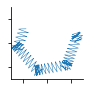

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(V)
scale = 0.664735099
fig, ax = plt.subplots(1, 1, figsize=(scale * 2, scale * 2))
ax.plot(principalComponents[:, 0], principalComponents[:, 1], lw = 0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_aspect(1)
ax.set_xlim([-6, 6])
ax.set_ylim([-4, 8])
ax.set_xticks((-4, 0, 4))
ax.set_xticklabels([])
ax.set_yticks((-2, 2, 6))
ax.set_yticklabels([])
fig.savefig('SFIG2B.pdf')
var = pca.explained_variance_ratio_
print(var, "Var of both components: {}".format(var[0] + var[1]))

In [5]:
np.random.seed(seed)

# Create Network and Simulation Parameters
dim = 50
N = 1000
threshold = 0.6
seed = 1

time_r = 0.4
time_c = 10
dt = 1e-4
T_r = int(time_r / dt)
T_c = int(time_c / dt)

s_mag = 5
lambd = 10
noise = 0

F = np.random.randn(N, dim)
for i in range(N):
    F[i, :] /= np.linalg.norm(F[i, :])
Th = threshold * np.ones(N)
D = F.T
Omega = np.dot(F, D)
Lambd = lambd * np.ones(N)

no_points = 5
points = np.random.randn(no_points, dim)
for i in range(no_points):
    points[i, :] /= np.linalg.norm(points[i, :])
X_r = np.zeros((T_r + 1, dim))
for i in range(T_r + 1):
    X_r[i, :] = s_mag * i * points[0, :] / T_r
Xdot_r = np.diff(X_r.T).T / dt
X_r = X_r[:-1, :]
C_r = Xdot_r + lambd * X_r

jump = int(T_c / (no_points - 1))
X = np.zeros(((no_points - 1) * jump + 1, dim))
for i in range(no_points - 1):
    for j in range(jump):
        X[i*jump + j, :] = (1 - j / jump) * points[i, :] + (j / jump) * points[i + 1, :]
        X[i*jump + j, :] *= s_mag / np.linalg.norm(X[i*jump + j, :])

Xdot = np.diff(X.T).T / dt
C = Xdot + lambd * X[:-1, :]

In [ ]:
# Run Simulation
dV_r = np.zeros((T_r, N))
R_r, Spikes_r, R0, V0 = nt.sim(F, Omega, Th, C_r, dt, dV_r, Lambd, lambd, 0, np.zeros(N), np.zeros(N), seed=seed)
Xh_r = np.dot(R_r, D.T)


dV = np.zeros((T_c, N))
R, Spikes, V, R0, V0 = nt.sim(F, Omega, Th, C, dt, dV, Lambd, lambd, 0, R0, V0, voltages=True, seed=seed)
Xh = np.dot(R, D.T)

dt 0.0001 ref 30 delay 0 N 1000 most saturated neuron:  0.0 average saturated neuron: 0.0


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(V[:-1, :])

fig, ax = plt.subplots(1, 1, figsize=(scale * 2, scale * 2))
ax.plot(principalComponents[:, 0], principalComponents[:, 1], lw = 0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_aspect(1)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_xticks((-2, 1, 4))
ax.set_xticklabels([])
ax.set_yticks((-3, 0, 3))
ax.set_yticklabels([])
fig.savefig('SFIG2C.pdf')
var = pca.explained_variance_ratio_
print(var, "Var of both components: {}".format(var[0] + var[1]))